# Final Project Submission

Please fill out:
* Student name: Andy Martin del Campo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Victor
* Blog post URL:


### Project Steps I think

1. Get Data
2. Clean Data
    a. Make sure all data is the right type
    b. Make sure there are no NaN values
    c. Check for duplicates
    d. Check for outliers
    e. Normalize
3. Figure out which features are important
    a. Check for correlation
    b. RFE
4. Model

look up Crisp-DM and OSEMN

# Getting the data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = pd.read_csv('kc_house_data.csv')

In [2]:
#brief look at data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [28]:
#get info on columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## First Assumptions
- It looks like the data all has the same number of entries. 

# Cleaning the Data

## Check for duplicates

In [ ]:
df.id.value_counts()
df[df.id == 795000620]

- For the 'id' column there are several houses which have been relisted at several points. It is okay that they have the same value
- No other column could show that there are duplicates


## Changing the column type to be something that makes sense

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [6]:
#Change date from a string to a datetime
df.date = pd.to_datetime(df.date)

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6           NaN
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18          NaN
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
          ...  
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581       NaN
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

In [17]:
#Change sqft_basement from a string to a float
#The issue is there are a lot of ? used. First I will change these to NaN 
#values and then the data type to float
df.sqft_basement = df.sqft_basement.replace('?',np.NaN)
df.sqft_basement = df.sqft_basement.astype('float64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

## Using IterativeImputer to impute missing values


In [27]:
df_no_date = df.drop(columns = ['date'])
df_no_date.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [46]:
imp = IterativeImputer(max_iter=10, verbose=0)
imp.fit(df_no_date)
imputed_df = np.round(imp.transform(df_no_date))
imputed_df = pd.DataFrame(imputed_df, columns=df_no_date.columns)
imputed_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,221900.0,3.0,1.0,1180.0,5650.0,1.0,-0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,48.0,-122.0,1340.0,5650.0
1,6.414100e+09,538000.0,3.0,2.0,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,48.0,-122.0,1690.0,7639.0
2,5.631500e+09,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,131.0,98028.0,48.0,-122.0,2720.0,8062.0
3,2.487201e+09,604000.0,4.0,3.0,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,48.0,-122.0,1360.0,5000.0
4,1.954401e+09,510000.0,3.0,2.0,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,48.0,-122.0,1800.0,7503.0


In [43]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [67]:
imputed_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.534750,0.006760,0.234153,3.409825,7.657915,1788.596842,291.725008,1970.999676,83.784600,98077.951845,47.694356,-122.000046,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.554376,0.081944,0.765979,0.650546,1.173200,827.759761,442.667800,29.375234,367.760789,53.513072,0.460690,0.040258,685.230472,27274.441950
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,-0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,-274.000000,98001.000000,47.000000,-123.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.000000,-122.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,48.000000,-122.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,48.000000,-122.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,6.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,48.000000,-121.000000,6210.000000,871200.000000


In [57]:
imputed_df.yr_renovated.value_counts()

 0.0       17018
 2014.0       73
 2013.0       31
 2003.0       31
 2007.0       30
 2000.0       29
 2005.0       29
 1990.0       22
 2004.0       22
 82.0         22
-11.0         22
-17.0         21
 2009.0       21
 42.0         20
 104.0        20
 1989.0       20
 2006.0       20
 46.0         20
 9.0          19
-8.0          19
 35.0         19
 136.0        19
 54.0         19
 16.0         19
 20.0         19
-19.0         18
 53.0         18
 8.0          18
 2002.0       17
 34.0         17
           ...  
 594.0         1
 1971.0        1
 792.0         1
-133.0         1
-233.0         1
 291.0         1
 1948.0        1
-179.0         1
 348.0         1
-184.0         1
-108.0         1
 1934.0        1
 756.0         1
 471.0         1
 646.0         1
-232.0         1
 352.0         1
-211.0         1
 259.0         1
-126.0         1
 603.0         1
-165.0         1
 337.0         1
 626.0         1
-172.0         1
 296.0         1
-156.0         1
 1976.0       

This seems to have worked well for every feature except 'yr_renovated'. Since it gives very low years and negatives because so many 0's were already in place. This column will more than likely not be relevant. I'll also drop the index column.

In [66]:
imputed_df = imputed_df.drop(columns = ['id'])

## Look at data for any outliers

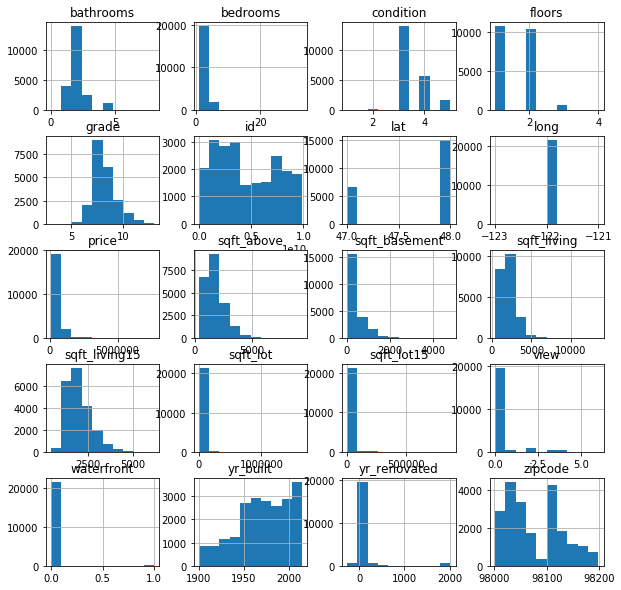

In [60]:
imputed_df.hist(figsize=(10,10));

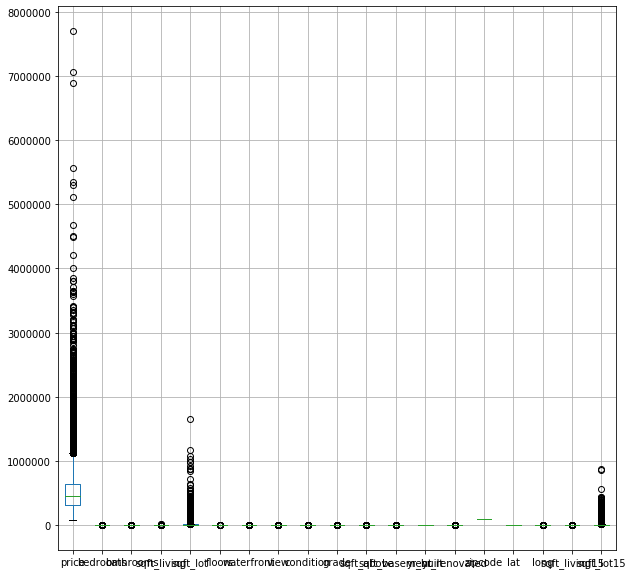

In [68]:
imputed_df.boxplot(figsize=(10,10));

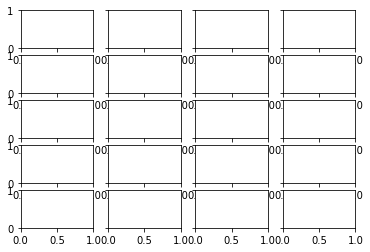

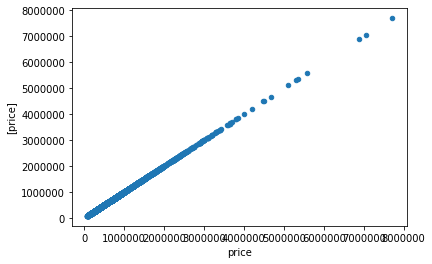

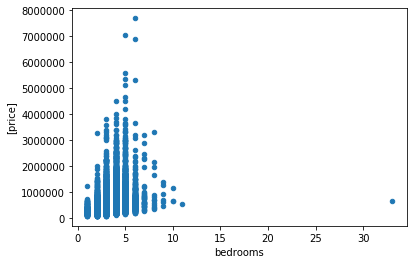

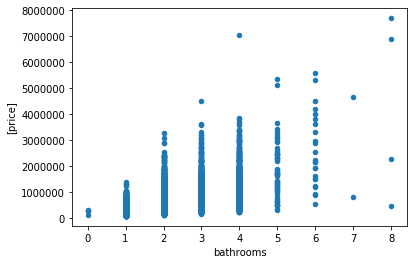

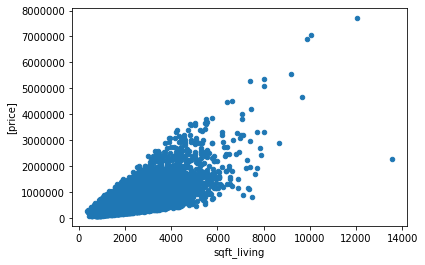

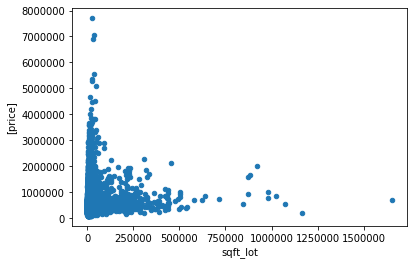

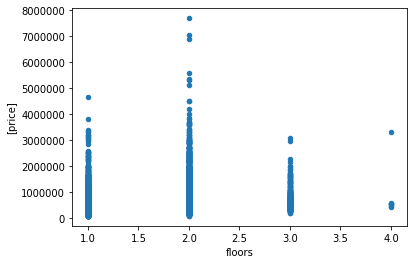

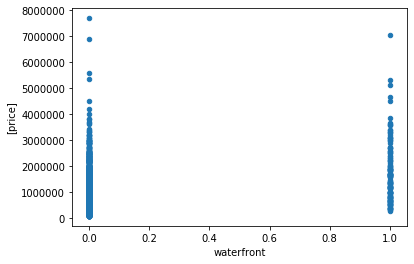

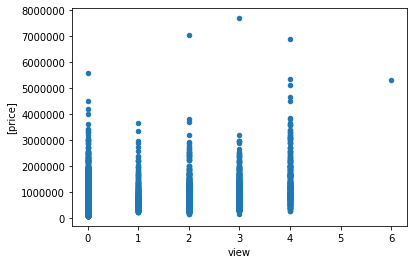

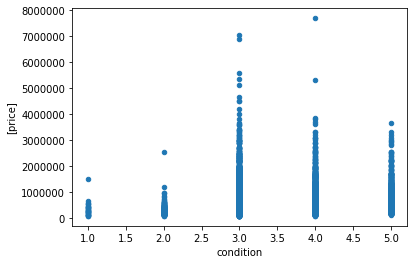

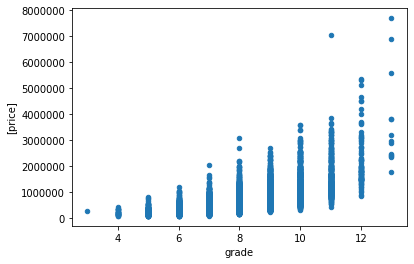

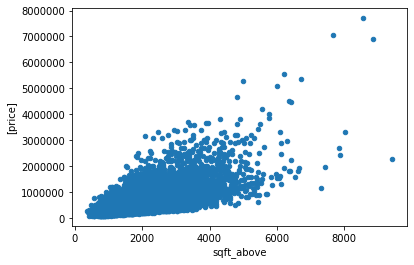

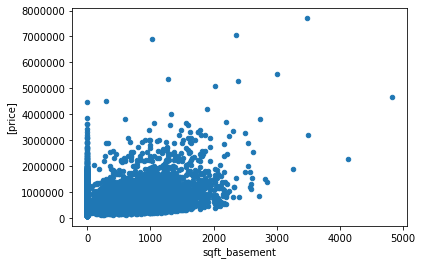

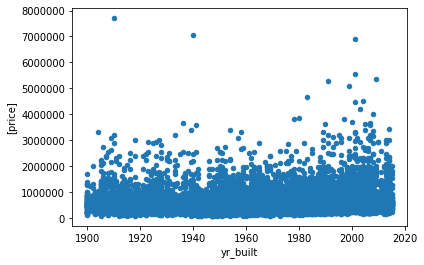

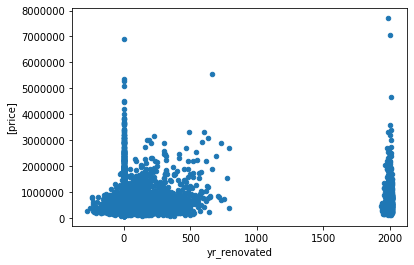

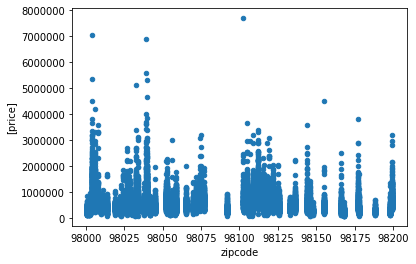

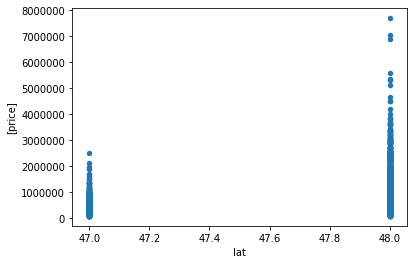

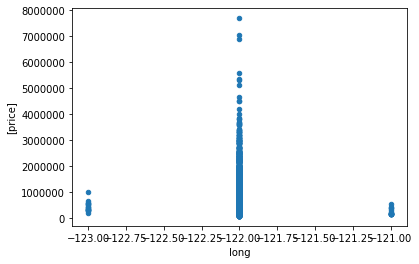

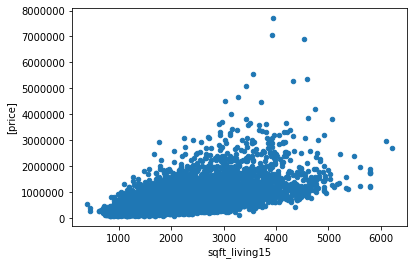

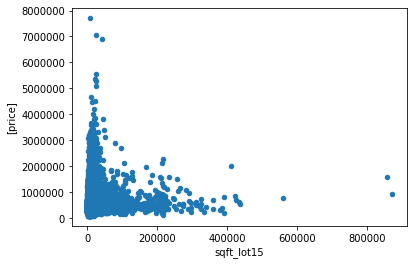

In [88]:
fig, axes = plt.subplots(5, 4, sharey=True)

for col in imputed_df:
    imputed_df.plot.scatter(x=col, y=['price'])
    
plt.show()
